In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib as mpl
import seaborn as sb
mpl.rcParams["figure.figsize"] = (15,8)
import numpy as np
import matplotlib.pyplot as plt
import stingray.simulator as ss
from stingray.lightcurve import Lightcurve
from stingray.events import EventList
from tqdm import tqdm
import matplotlib as mpl
import time

mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16


In [2]:
BUFFER_LC = Lightcurve([0, 1], [1, 1], gti=[[-0.5, 1.5]], dt=1, err_dist='gauss')
#cont_obs = 2400
def pulsar_events(length, period, ctrate, pulsed_fraction=0.5, bkg_ctrate=0, mean_obs=500):
    dt = period / 20
    # The total length of the time series should be the number of pointings times the time per orbit. 
    # Add one orbit for buffer.
    N_orb = int(round(length/mean_obs, 0))
    tot_len = (N_orb + 1)*iss_orb
    times = np.arange(dt/2, tot_len + dt/2, dt)
    cont_lc = (ctrate * (1 + pulsed_fraction * np.cos(2 * np.pi / period * times)) * dt) + (bkg_ctrate*dt)
    lc = BUFFER_LC
    lc.time = times
    lc.counts = cont_lc
    # The ISS orbital period is 5560.8s. Every 5560.8s, a continuous observation with min_obs < length < max_obs begins
    start_t = np.multiply(np.arange(N_orb), np.random.normal(loc = iss_orb, scale = 120, size = N_orb))
    point_t = np.random.normal(loc=mean_obs, scale = mean_obs/4, size = N_orb)
    end_t = np.add(start_t, point_t)
    exposure = np.sum(point_t)
    lc.gti = np.column_stack((start_t, end_t))
#     exposure = 0
#     orbit = 0
#     while abs(length - exposure) > mean_obs:
#         start = orbit * (np.random.normal(loc = iss_orb, scale = 120))
#         point_len = np.random.normal(loc=mean_obs, scale = mean_obs/4)
#         lc.gti.append([start, start + point_len])
#         orbit += 1
#         exposure += point_len
    #lc.gti = [[i * iss_orb, (i * iss_orb) + (np.random.random() * (max_obs - min_obs) + min_obs)] for i in range(int(length/iss_orb) +1)]
    lc.dt = dt
#     Lightcurve(times, cont_lc, err_dist='gauss', dt=dt)
    events = EventList()
    events.gti = lc.gti
    events.simulate_times(lc)
    return events, exposure

def pulsar_events_mp(length, period, ctrate, pulsed_fraction, mean_obs, bkg_ctrate, detlev, nbin = 128):
    
    BUFFER_LC = Lightcurve([0, 1], [1, 1], gti=[[-0.5, 1.5]], dt=1, err_dist='gauss')
    iss_orb = 5560.8
    
    dt = period / 20
    # The total length of the time series should be the number of pointings times the time per orbit. 
    # Add one orbit for buffer.
    N_orb = int(round(length/mean_obs, 0))
    tot_len = (N_orb + 1)*iss_orb
    times = numpy.arange(dt/2, tot_len + dt/2, dt)
    cont_lc = (ctrate * (1 + pulsed_fraction * numpy.cos(2 * numpy.pi / period * times)) * dt) + (bkg_ctrate*dt)
    lc = BUFFER_LC
    lc.time = times
    lc.counts = cont_lc
    # The ISS orbital period is 5560.8s. Every 5560.8s, a continuous observation with min_obs < length < max_obs begins
    start_t = numpy.multiply(numpy.arange(N_orb), numpy.random.normal(loc = iss_orb, scale = 120, size = N_orb))
    point_t = numpy.random.normal(loc=mean_obs, scale = mean_obs/4, size = N_orb)
    end_t = numpy.add(start_t, point_t)
    exposure = numpy.sum(point_t)
    lc.gti = numpy.column_stack((start_t, end_t))
    lc.dt = dt
    events = EventList()
    events.gti = lc.gti
    events.simulate_times(lc)
    phase = numpy.arange(0, 1, 1 / nbin)
    zsq = z_n(phase, n=2,
              norm=fold_events(events.time, 1/period, nbin=nbin)[1])
    detected = zsq > detlev
    return (detected, exposure)



/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1rc1-py3.6.egg/stingray/utils.py:89: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


In [ ]:
# Count rate Brightman+ 2016 spectral analysis, and WebPIMMS. This count rate is in the high state.
ctrate = 0.8
# background rate estimate from https://heasarc.gsfc.nasa.gov/docs/nicer/papers/NICER-SPIE-July2012-v4.pdf
bkg = 0.05
# Period from 
period = 0.1


pulsed_fraction = 0.05
events, exposure = pulsar_events(10000, 1.37, ctrate)

In [10]:
# lc = Lightcurve.make_lightcurve(events.time, 0.1)
lc = events.to_lc(0.1)
events.gti

array([[     0.        ,    339.08685376],
       [  5541.92609559,   5877.79658475],
       [ 11006.1172228 ,  11518.82457117],
       [ 17059.88116428,  17555.0568074 ],
       [ 22205.7368275 ,  22667.29879702],
       [ 26731.28979973,  27330.95604164],
       [ 32285.8962239 ,  32806.41336   ],
       [ 39832.26356865,  40176.24101263],
       [ 43966.74146281,  44455.48630893],
       [ 50405.97916207,  50831.32539104],
       [ 56270.31214623,  56690.39951229],
       [ 58501.0561738 ,  58887.34038324],
       [ 63599.19338118,  64162.10016475],
       [ 71396.96326797,  71813.3049233 ],
       [ 75306.67516686,  75839.81909254],
       [ 82804.82004646,  83349.96892329],
       [ 92093.01669645,  92566.01407293],
       [ 96245.5368091 ,  96415.73434337],
       [ 96680.94074527,  97265.08797331],
       [103214.91123574, 103565.61573827]])

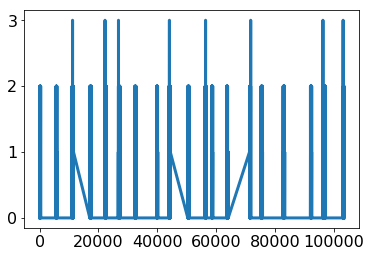

0.08058955448692916


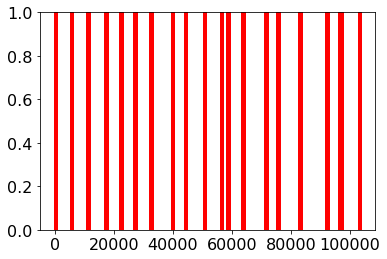

In [11]:
lc.plot()
for x in lc.gti:
    plt.axvline(x[0], c='red')
    plt.axvline(x[1], c='red')
print(np.mean(lc.counts))

In [3]:
from astropy.table import Table
import ipyparallel as ipp

def detected_pulse_fraction(pf_min, pf_max, length_min, length_max, 
                            ctrate_min=1.4, ctrate_max=1.4, 
                            period_min=1, period_max=1, n_realizations=1000, 
                            ntrial=1000, results=None, nbin=128, min_mean_obs = 500, max_mean_obs = 500, bkg_ctrate = 0):
    
    from stingray.pulse.pulsar import z2_n_detection_level, z_n, fold_events
    if results is None:
        results = Table(names=["period", "countrate", "pf", 
                               "length", "mean_obs", "detected"], 
                        dtype=[float, float, float, float, float, bool])

    detlev = z2_n_detection_level(ntrial=ntrial)

    pfs = 10**np.random.uniform(np.log10(pf_min), 
                                np.log10(pf_max), n_realizations)
    lengths = 10**np.random.uniform(np.log10(length_min), 
                                    np.log10(length_max), n_realizations)
    periods = 10**np.random.uniform(np.log10(period_min), 
                                    np.log10(period_max), n_realizations)
    ctrates = 10**np.random.uniform(np.log10(ctrate_min), 
                                    np.log10(ctrate_max), n_realizations)
    mean_obss = 10**np.random.uniform(np.log10(min_mean_obs), 
                                    np.log10(max_mean_obs), n_realizations)

#     print('All variables generated')
    for i in tqdm(range(n_realizations)):
        pf, length, period, ctrate, mean_obs = pfs[i], lengths[i], periods[i], ctrates[i], mean_obss[i]
        events, length = pulsar_events(length, period, ctrate, pulsed_fraction=pf, mean_obs = mean_obs, bkg_ctrate = bkg_ctrate)
        phase = np.arange(0, 1, 1 / nbin)
        zsq = z_n(phase, n=2,
                  norm=fold_events(events.time, 1/period, nbin=nbin)[1])
        detected = zsq > detlev
        results.add_row([period, ctrate, pf, length, mean_obs, detected])

    return results
        
def detected_pulse_fraction_mp(pf_min, pf_max, length_min, length_max, 
                            ctrate_min=1.4, ctrate_max=1.4, 
                            period_min=1, period_max=1, n_realizations=1000, 
                            ntrial=1000, results=None, nbin=128, min_mean_obs = 500, max_mean_obs = 500, 
                            bkg_ctrate = 0, cores = 8):
    if results is None:
        results = Table(names=["period", "countrate", "pf", 
                               "length", "mean_obs", "detected"], 
                        dtype=[float, float, float, float, float, bool])

    pfs = 10**np.random.uniform(np.log10(pf_min), 
                                np.log10(pf_max), n_realizations)
    lengths = 10**np.random.uniform(np.log10(length_min), 
                                    np.log10(length_max), n_realizations)
    periods = 10**np.random.uniform(np.log10(period_min), 
                                    np.log10(period_max), n_realizations)
    ctrates = 10**np.random.uniform(np.log10(ctrate_min), 
                                    np.log10(ctrate_max), n_realizations)
    mean_obss = 10**np.random.uniform(np.log10(min_mean_obs), 
                                    np.log10(max_mean_obs), n_realizations)
    
    c = ipp.Client()
    v = c[:]
    with v.sync_imports():
        import numpy
        from stingray.events import EventList
        from stingray.lightcurve import Lightcurve
        from stingray.pulse.pulsar import z2_n_detection_level, z_n, fold_events
        
    detlev = z2_n_detection_level(ntrial=ntrial)
    map_results = v.map(pulsar_events_mp, lengths, periods, ctrates, pfs, mean_obss, [bkg_ctrate for i in range(n_realizations)], [detlev for i in range(n_realizations)])
    c.wait_interactive()
    c.shutdown()
    for i in range(n_realizations):
        pf, period, ctrate, mean_obs = pfs[i], periods[i], ctrates[i], mean_obss[i]
        detected, length = map_results[i]
        results.add_row([period, ctrate, pf, length, mean_obs, detected])
    
    return results
        

In [ ]:
# background rate estimate from https://heasarc.gsfc.nasa.gov/docs/nicer/papers/NICER-SPIE-July2012-v4.pdf
#bkg = 0.05
# Using diffuse background analysis from Brightman+2016 (https://arxiv.org/pdf/1607.03903.pdf) + WebSpec
diffuse_bkg = 6.5
# Using M82 X-1 analysis from Brightman+2016 (https://arxiv.org/pdf/1607.03903.pdf) + WebPIMMS
X1_bkg = 2.4
bkg = diffuse_bkg + X1_bkg
pfmin, pfmax = 0.05, 0.15
lengthmin, lengthmax = 1000, 300000
ctrate_min, ctrate_max = 0.8, 0.8
#period_min, period_max = 1.37, 1.37
period_min, period_max = 0.1, 0.1

# table_len_pf = detected_pulse_fraction(pfmin, pfmax, lengthmin, lengthmax, 
#                                 ctrate_min, ctrate_max, period_min, period_max,
#                                 n_realizations=10000, ntrial=10000, bkg_ctrate = bkg)

table_len_pf = detected_pulse_fraction_mp(pfmin, pfmax, lengthmin, lengthmax, 
                                ctrate_min, ctrate_max, period_min, period_max,
                                n_realizations=1000, ntrial=1000, bkg_ctrate = bkg)

   0/4 tasks finished after  143 s

# First attempt: linear SVM, log10 of features

In [5]:
from sklearn.svm import SVC
linear_clf = SVC(kernel="linear",  C=1, probability=True)

In [6]:
idx = np.arange(len(table_len_pf), dtype=int)
indices_train = np.random.randint(0, len(table_len_pf), len(table_len_pf)//3)
indices_train = np.unique(indices_train)

indices = np.asarray([k for k in range(len(table_len_pf)) if k not in indices_train])
full_dataset = np.array(table_len_pf["pf", "length"])
dataset = np.take(full_dataset, indices)

labels = np.array(np.take(table_len_pf["detected"], indices))

training_dataset = np.take(full_dataset, indices_train)
labels_train = np.array(np.take(table_len_pf["detected"], indices_train))

features = np.zeros((len(dataset), len(list(dataset[0]))))
for i in range(len(dataset)):
    features[i, :] = list(dataset[i])

features_train = np.zeros((len(training_dataset), len(list(training_dataset[0]))))
for i in range(len(training_dataset)):
    features_train[i, :] = list(training_dataset[i])

In [7]:
linear_clf.fit(np.log10(features_train), labels_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
linear_clf.score(np.log10(features), labels)

0.9442197740900851

In [9]:
linear_clf.coef_, linear_clf.intercept_
const, pf_fact, len_fact = linear_clf.intercept_[0], linear_clf.coef_[0][0], linear_clf.coef_[0][1]

In [10]:
from IPython.display import display, Math, Latex
display(Math(r"${:.2f} + {:.2f} \log_{{10}} F + {:.2f} \log_{{10}} L = 0$".format(const, pf_fact, len_fact)))
display(Math(r"${:.2f} \log_{{10}} F + \log_{{10}} L = {:.2f}$".format(pf_fact / len_fact, -const / len_fact)))

display(Math(r"$F^{" + "{:.2f}".format(pf_fact / len_fact) + "}" + " L = {:.2f}$".format(10**(-const / len_fact))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

which is not too dissimilar from the expected $LF^2$ relationship

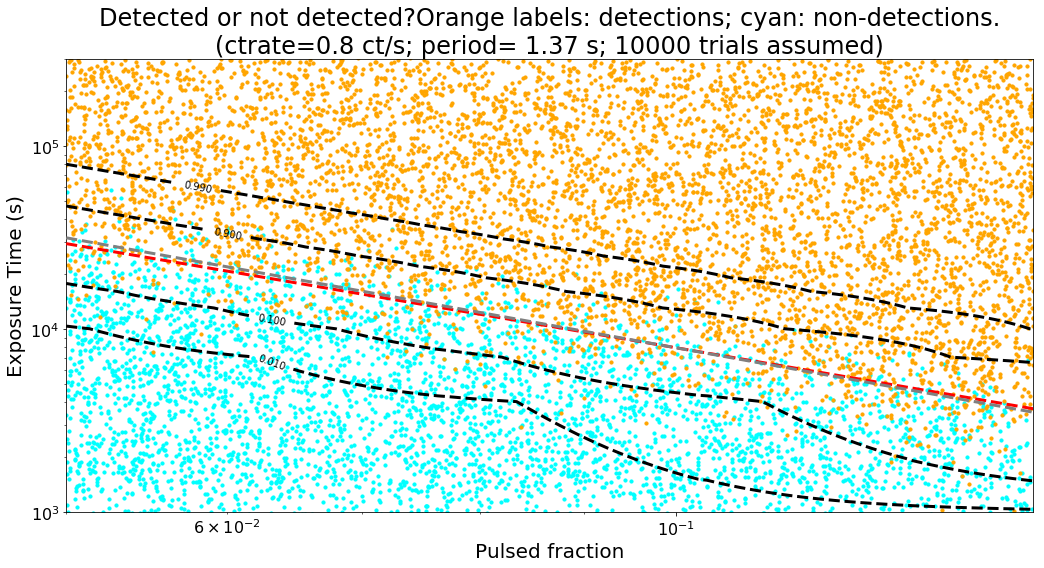

In [11]:
xs = np.linspace(pfmin, pfmax, 100)
ys = np.linspace(lengthmin, lengthmax, 100)
xx, yy = np.meshgrid(xs, ys)
Xfull = np.c_[xx.ravel(), yy.ravel()]

proba = linear_clf.predict_proba(np.log10(Xfull))

proba_detection = proba[:,1].reshape((100, 100))

plt.figure(figsize=(15, 8))
# plt.pcolormesh(xx, yy, proba_detection, cmap='Greys_r')
# plt.colorbar()

good = table_len_pf["detected"] == True
bad = np.logical_not(good)
plt.scatter(table_len_pf["pf"][bad], table_len_pf["length"][bad], color="cyan", 
            label="Not detected", s=10)
plt.scatter(table_len_pf["pf"][good], table_len_pf["length"][good], color="orange", 
            label="Detected", s=10)
plt.title("Detected or not detected?"
          "Orange labels: detections; cyan: non-detections.\n"
          "(ctrate={} ct/s; period= {} s; 10000 trials assumed)".format(ctrate_min, period_min))
plt.xlabel("Pulsed fraction")
plt.ylabel("Exposure Time (s)")
plt.loglog()
plt.xlim([pfmin, pfmax])
plt.ylim([lengthmin, lengthmax])
# plt.xticks([0.1, 0.2, 0.3])
# plt.yticks([200, 500, 1000, 2000])
ax = plt.gca()
xticks = np.arange(pfmin, pfmax, 0.01)
# yticks = [2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
# ax.set_xticks(xticks)
# ax.set_yticks(yticks)
# ax.set_xticklabels(['{:.2f}'.format(x) for x in xticks])
# ax.set_yticklabels(['{:d}'.format(y) for y in yticks])
# for x in xticks:
#     plt.axvline(x, color='grey', ls='--', zorder=10)
# for y in yticks:
#     plt.axhline(y, color='grey', ls='--', zorder=10)
# plt.ticklabel_format(style='plain')
C_exp = -linear_clf.intercept_/linear_clf.coef_[0, 1]
F_exp = linear_clf.coef_[0, 0] / linear_clf.coef_[0, 1]
plt.plot(xs, 10**C_exp / xs ** F_exp, 'r--', lw=3, zorder=10)
plt.plot(xs, 10**(C_exp * (F_exp / 2)) / xs ** 2, color='grey', ls='--', lw=3, zorder=10)

print()
levels = [0.01, 0.1, 0.9, 0.99]
CS = plt.contour(xx, yy, proba_detection, levels, 
                 linestyles='dashed', colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.tight_layout()
plt.savefig('detection_len_pf_shortp.pdf')
#plt.savefig('detection_len_pf.pdf')


## Counts vs PF, fixed length

In [32]:
lengthmin, lengthmax = 5e5, 5e5
ctrate_min, ctrate_max = 0.005, 0.8
pfmin, pfmax = 0.05, 0.15
#period_min, period_max = 1.37, 1.37
period_min, period_max = 0.1, 0.1
print(bkg)


8.9


In [33]:
# !snakeviz pf_profile.prof

In [34]:
# table_cnt_pf = detected_pulse_fraction(pfmin, pfmax, lengthmin, lengthmax, 
#                                 ctrate_min, ctrate_max, period_min, period_max,
#                                 n_realizations=1000, ntrial=1000, bkg_ctrate = bkg)

table_cnt_pf = detected_pulse_fraction_mp(pfmin, pfmax, lengthmin, lengthmax, 
                                ctrate_min, ctrate_max, period_min, period_max,
                                n_realizations=1000, ntrial=1000, bkg_ctrate = bkg)

   5/5 tasks finished after 6851 s
done


In [35]:
from sklearn.svm import SVC
linear_clf = SVC(kernel="linear",  C=1, probability=True)

In [36]:
idx = np.arange(len(table_cnt_pf), dtype=int)
indices_train = np.random.randint(0, len(table_cnt_pf), len(table_cnt_pf)//3)
indices_train = np.unique(indices_train)

indices = np.asarray([k for k in range(len(table_cnt_pf)) if k not in indices_train])
full_dataset = np.array(table_cnt_pf["pf", "countrate"])
dataset = np.take(full_dataset, indices)

labels = np.array(np.take(table_cnt_pf["detected"], indices))

training_dataset = np.take(full_dataset, indices_train)
labels_train = np.array(np.take(table_cnt_pf["detected"], indices_train))

features = np.zeros((len(dataset), len(list(dataset[0]))))
for i in range(len(dataset)):
    features[i, :] = list(dataset[i])

features_train = np.zeros((len(training_dataset), len(list(training_dataset[0]))))
for i in range(len(training_dataset)):
    features_train[i, :] = list(training_dataset[i])

In [37]:
linear_clf.fit(np.log10(features_train), labels_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
linear_clf.score(np.log10(features), labels)

0.9487534626038782

In [39]:
linear_clf.coef_, linear_clf.intercept_
const, pf_fact, ctr_fact = linear_clf.intercept_[0], linear_clf.coef_[0][0], linear_clf.coef_[0][1]

In [40]:
from IPython.display import display, Math, Latex
display(Math(r"${:.2f} + {:.2f} \log_{{10}} F + {:.2f} \log_{{10}} C = 0$".format(const, pf_fact, ctr_fact)))
display(Math(r"${:.2f} \log_{{10}} F + \log_{{10}} C = {:.2f}$".format(pf_fact / ctr_fact, -const / ctr_fact)))

display(Math(r"$F^{" + "{:.2f}".format(pf_fact / ctr_fact) + "}" + " C = {:.2f}$".format(10**(-const / ctr_fact))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

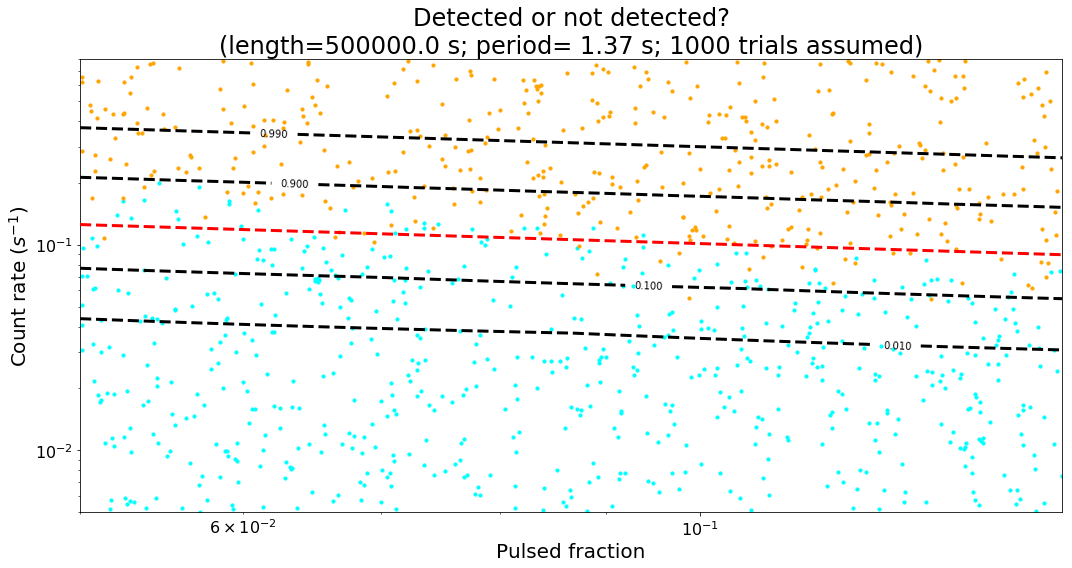

In [41]:
xs = np.linspace(pfmin, pfmax, 100)
ys = np.linspace(ctrate_min, ctrate_max, 100)
xx, yy = np.meshgrid(xs, ys)
Xfull = np.c_[xx.ravel(), yy.ravel()]

proba = linear_clf.predict_proba(np.log10(Xfull))

proba_detection = proba[:,1].reshape((100, 100))

plt.figure(figsize=(15, 8))
# plt.pcolormesh(xx, yy, proba_detection, cmap='Greys_r')
# plt.colorbar()

good = table_cnt_pf["detected"] == True
bad = np.logical_not(good)
plt.scatter(table_cnt_pf["pf"][bad], table_cnt_pf["countrate"][bad], color="cyan", 
            label="Not detected", s=10)
plt.scatter(table_cnt_pf["pf"][good], table_cnt_pf["countrate"][good], color="orange", 
            label="Detected", s=10)
plt.title("Detected or not detected?\n"
          "(length={} s; period= {} s; 1000 trials assumed)".format(lengthmin, period_min))
plt.xlabel("Pulsed fraction")
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.loglog()
plt.xlim([pfmin, pfmax])
plt.ylim([ctrate_min, ctrate_max])
# plt.xticks([0.1, 0.2, 0.3])
# plt.yticks([200, 500, 1000, 2000])
ax = plt.gca()
# xticks = np.arange(pfmin, pfmax, 0.05)
# yticks = [200, 500, 1000, 2000, 5000, 10000, 20000]
# ax.set_xticks(xticks)
# ax.set_yticks(yticks)
# ax.set_xticklabels(['{:.2f}'.format(x) for x in xticks])
# ax.set_yticklabels(['{:d}'.format(y) for y in yticks])
# for x in xticks:
#     plt.axvline(x, color='grey', ls='--', zorder=10)
# for y in yticks:
#     plt.axhline(y, color='grey', ls='--', zorder=10)
# plt.ticklabel_format(style='plain')
C_exp = -linear_clf.intercept_/linear_clf.coef_[0, 1]
F_exp = linear_clf.coef_[0, 0] / linear_clf.coef_[0, 1]
plt.plot(xs, 10**C_exp / xs ** F_exp, 'r--', lw=3, zorder=10)
plt.plot(xs, 10**(C_exp * (F_exp / 2)) / xs ** 2, color='grey', ls='--', lw=3, zorder=10)

print()
levels = [0.01, 0.1, 0.9, 0.99]
CS = plt.contour(xx, yy, proba_detection, levels, 
                 linestyles='dashed', colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.tight_layout()
plt.savefig('detection_ctrate_pf_shortp.pdf')
#plt.savefig('detection_ctrate_pf.pdf')


# Length vs. minimum continuous observation

In [43]:
pfmin, pfmax = 0.05, 0.05
lengthmin, lengthmax = 1000, 30000
ctrate_min, ctrate_max = 0.8, 0.8
period_min, period_max = 1.37, 1.37
min_mean_obs = 400
max_mean_obs = 2200


table_len_obs = detected_pulse_fraction_mp(pfmin, pfmax, lengthmin, lengthmax, 
                                ctrate_min, ctrate_max, period_min, period_max,
                                n_realizations=1000, ntrial=1000, min_mean_obs = min_mean_obs, max_mean_obs = max_mean_obs, bkg_ctrate = bkg)

   4/4 tasks finished after 5793 s
done


In [44]:
linear_clf = SVC(kernel="linear",  C=1, probability=True)

In [45]:
idx = np.arange(len(table_len_obs), dtype=int)
indices_train = np.random.randint(0, len(table_len_obs), len(table_len_obs)//3)
indices_train = np.unique(indices_train)

indices = np.asarray([k for k in range(len(table_len_obs)) if k not in indices_train])
full_dataset = np.array(table_len_obs["length", "mean_obs"])
dataset = np.take(full_dataset, indices)

labels = np.array(np.take(table_len_obs["detected"], indices))

training_dataset = np.take(full_dataset, indices_train)
labels_train = np.array(np.take(table_len_obs["detected"], indices_train))

features = np.zeros((len(dataset), len(list(dataset[0]))))
for i in range(len(dataset)):
    features[i, :] = list(dataset[i])

features_train = np.zeros((len(training_dataset), len(list(training_dataset[0]))))
for i in range(len(training_dataset)):
    features_train[i, :] = list(training_dataset[i])

In [46]:
linear_clf.fit(np.log10(features_train), labels_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
linear_clf.score(np.log10(features), labels)

/Users/sean/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
linear_clf.coef_, linear_clf.intercept_
const, pf_fact, ctr_fact = linear_clf.intercept_[0], linear_clf.coef_[0][0], linear_clf.coef_[0][1]

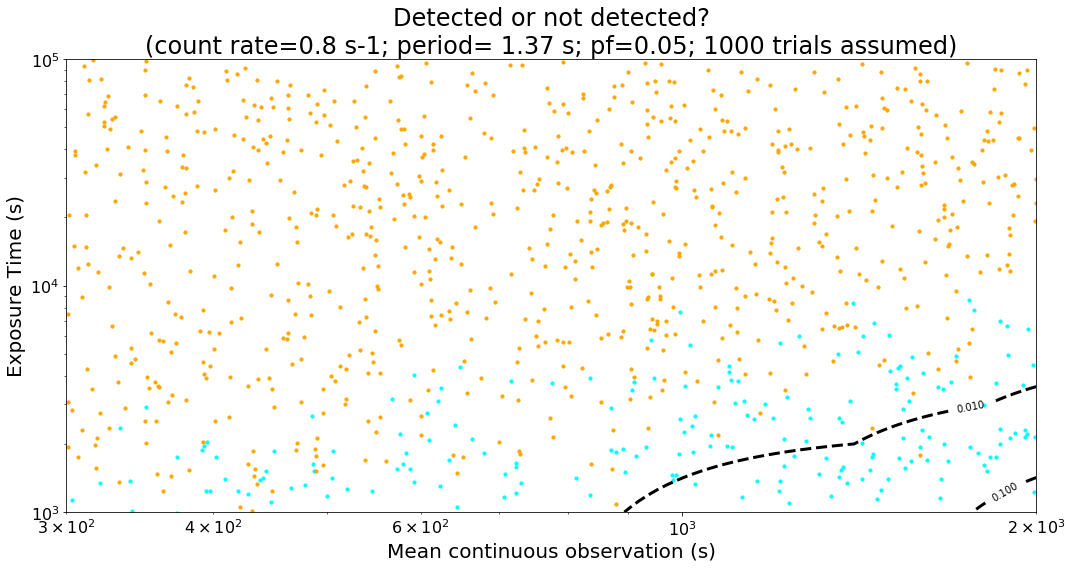

In [38]:
xs = np.linspace(min_mean_obs, max_mean_obs, 100)
ys = np.linspace(lengthmin, lengthmax, 100)
xx, yy = np.meshgrid(xs, ys)
Xfull = np.c_[xx.ravel(), yy.ravel()]

proba = linear_clf.predict_proba(np.log10(Xfull))

proba_detection = proba[:,1].reshape((100, 100))

plt.figure(figsize=(15, 8))
# plt.pcolormesh(xx, yy, proba_detection, cmap='Greys_r')
# plt.colorbar()

good = table_len_obs["detected"] == True
bad = np.logical_not(good)
plt.scatter(table_len_obs["mean_obs"][bad], table_len_obs["length"][bad], color="cyan", 
            label="Not detected", s=10)
plt.scatter(table_len_obs["mean_obs"][good], table_len_obs["length"][good], color="orange", 
            label="Detected", s=10)
plt.title("Detected or not detected?\n"
          "(count rate={} s-1; period= {} s; pf={}; 1000 trials assumed)".format(ctrate_min, period_min, pfmin))
plt.xlabel("Mean continuous observation (s)")
plt.ylabel("Exposure Time (s)")
plt.loglog()
plt.xlim([min_mean_obs, max_mean_obs])
plt.ylim([lengthmin, lengthmax])
ax = plt.gca()
C_exp = -linear_clf.intercept_/linear_clf.coef_[0, 1]
F_exp = linear_clf.coef_[0, 0] / linear_clf.coef_[0, 1]
plt.plot(xs, 10**C_exp / xs ** F_exp, 'r--', lw=3, zorder=10)
plt.plot(xs, 10**(C_exp * (F_exp / 2)) / xs ** 2, color='grey', ls='--', lw=3, zorder=10)

print()
levels = [0.01, 0.1, 0.9, 0.99]
CS = plt.contour(xx, yy, proba_detection, levels, 
                 linestyles='dashed', colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.tight_layout()
#plt.savefig('detection_len_minobs.pdf')

